In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandata109.xlsx', index_col=0)

In [3]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg','interpreting_process_avg', 'straightforward_process_avg','avgscore']

In [4]:
df_experience = df[identifier_columns+negativeexperience_in_school_columns]

In [5]:
pivot_df_experienceinschool = df_experience.pivot_table(values=negativeexperience_in_school_columns, index=identifier_columns, aggfunc='mean').reset_index()

In [6]:
pivot_df_experienceinschool

,Country,ASBH02A,ASBG11A,ASBG11B,ASBG11C,ASBG11D,ASBG11E,ASBG11F,ASBG11G,ASBG11H,ASBG11I,ASBG11J
0,Austria,No,2.726457,2.986517,2.866817,3.460137,3.269058,3.022422,3.357143,3.399103,3.659243,3.654709
1,Austria,Yes,3.041048,3.184503,3.121587,3.604669,3.510338,3.166541,3.540146,3.624811,3.788297,3.718884
2,Egypt,No,2.896694,2.928270,3.137500,3.181435,3.170124,3.033613,3.175966,3.250000,3.303419,3.288136
3,Egypt,Yes,3.069665,3.038547,3.265500,3.299629,3.242747,3.178399,3.332795,3.361719,3.394908,3.332957
4,France,No,3.271186,3.374468,3.393162,3.512821,3.761702,3.282051,3.646809,3.862661,3.885106,3.719149
5,France,Yes,3.376076,3.416213,3.461259,3.709567,3.752840,3.353102,3.691431,3.877760,3.922972,3.760055
6,Germany,No,2.947059,2.885542,3.082840,3.421687,3.430303,3.220930,3.497041,3.610778,3.700599,3.658683
7,Germany,Yes,3.097504,3.055477,3.402086,3.721826,3.667313,3.210526,3.673095,3.764151,3.854900,3.739318
8,Jordan,No,3.380388,3.283262,3.386117,3.458735,3.489883,3.500536,3.595722,3.615139,3.652688,3.588110
9,Jordan,Yes,3.392230,3.331656,3.394493,3.499672,3.481239,3.532304,3.603264,3.632254,3.678377,3.616408


##  This is for bar chart

In [7]:
df_no = pivot_df_experienceinschool[pivot_df_experienceinschool['ASBH02A']=='No']
df_no= df_no.drop('ASBH02A', axis=1)
df_no_melted = df_no.melt(id_vars='Country', var_name='Metric', value_name='Value')

In [8]:
df_yes = pivot_df_experienceinschool[pivot_df_experienceinschool['ASBH02A']=='Yes']
df_yes= df_yes.drop('ASBH02A', axis=1)
df_yes_melted = df_yes.melt(id_vars='Country', var_name='Metric', value_name='Value')

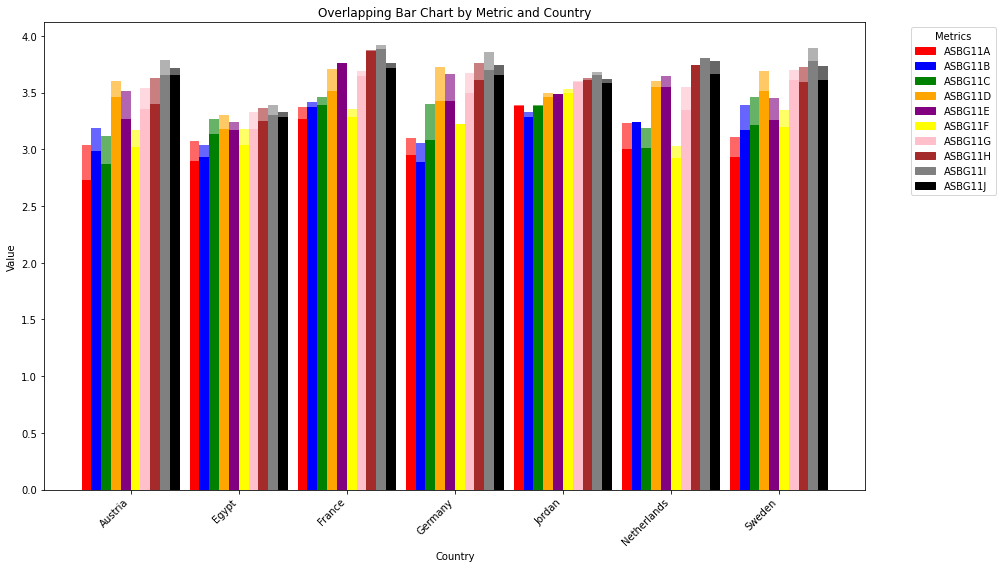

In [10]:
# Define bar width
bar_width = 1
n_metrics = df_no_melted['Metric'].nunique()

# Colors for each metric
colors = {
    'ASBG11A': 'red',
    'ASBG11B': 'blue',
    'ASBG11C': 'green',
    'ASBG11D': 'orange',
    'ASBG11E': 'purple',
    'ASBG11F': 'yellow',
    'ASBG11G': 'pink',
    'ASBG11H': 'brown',
    'ASBG11I': 'grey',
    'ASBG11J': 'black'
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Get unique countries and metrics
countries = df_no_melted['Country'].unique()
metrics = df_no_melted['Metric'].unique()

# Create x indices for each group of bars
indices = np.arange(len(countries)) * (n_metrics + 1)

# Plot each group of bars for 'yes' and 'no'
for i, metric in enumerate(metrics):
    yes_values = df_yes_melted[df_yes_melted['Metric'] == metric].set_index('Country').reindex(countries)['Value']
    no_values = df_no_melted[df_no_melted['Metric'] == metric].set_index('Country').reindex(countries)['Value']
    
    color = colors[metric]
    ax.bar(indices + i * bar_width, yes_values, bar_width, color=color, alpha=0.6)
    ax.bar(indices + i * bar_width, no_values, bar_width, color=color, alpha=1.0)

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Overlapping Bar Chart by Metric and Country')

# Set x-ticks and x-tick labels
ax.set_xticks(indices + bar_width * (n_metrics - 1) / 2)
ax.set_xticklabels(countries, rotation=45, ha='right')

# Create custom legend
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=metric) for metric, color in colors.items()]
ax.legend(handles=legend_handles, title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show plot
plt.tight_layout()
plt.show()

This isn't as clear cut as with assessment scores - which is interesting actually. Feeling better than their test results?

 1: At least once a week; 2: Once or twice a month; 3: A few times a year; 4: Never
 
ASBG11A	GEN\HOW OFTEN\MADE FUN OF\
ASBG11B	GEN\HOW OFTEN\LEFT OUT OF GAMES\
ASBG11C	GEN\HOW OFTEN\SPREADING LIES ABOUT ME\
ASBG11D	GEN\HOW OFTEN\STEALING STH FROM ME\
ASBG11E	GEN\HOW OFTEN\DAMAGED STH OF MINE\
ASBG11F	GEN\HOW OFTEN\HIT OR HURT ME\
ASBG11G	GEN\HOW OFTEN\MADE ME DO\
ASBG11H	GEN\HOW OFTEN\NASTY OF HURTFUL MESSAGES\
ASBG11I	GEN\HOW OFTEN\NASTY OF HURTFUL INFO\
ASBG11J	GEN\HOW OFTEN\THREATENED ME\